In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [6]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), #use to resize the image to 224x224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), #convert transformed image to tensor because pytorch uses tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # to make our input data have the same scale
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [7]:
# Define the data directory
data_dir = 'eye_dataset'

# Create data loaders
#train_datasets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'Train'), data_transforms['train'])
#test_datasets
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'Test'), data_transforms['val'])

#image_datasets
image_datasets = {
    'train': train_dataset,
    'val': val_dataset
}

In [8]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 1452, 'val': 365}


['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [9]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\hulsambath\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hulsambath\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\hulsambath/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 18.9MB/s]


In [10]:
# # Training loop
# num_epochs = 1
# for epoch in range(num_epochs):
#     for phase in ['train', 'test']:
#         if phase == 'train':
#             model.train()
#         else:
#             model.eval()

#         running_loss = 0.0
#         running_corrects = 0

#         for inputs, labels in dataloaders[phase]:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#         epoch_loss = running_loss / dataset_sizes[phase]
#         epoch_acc = running_corrects.double() / dataset_sizes[phase]

#         print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# print("Training complete!")

In [13]:
import matplotlib.pyplot as plt

num_epochs = 100  # Increase num_epochs to ensure the loop runs until epoch_acc reaches 0.9
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accs.append(epoch_acc)
        else:
            val_losses.append(epoch_loss)
            val_accs.append(epoch_acc)

        print(f'{phase} Loss: {epoch_loss:.4f} {phase} Acc: {epoch_acc:.4f}')
        print("training amount:", epoch+1)

    #     if epoch_acc >= 0.9:
    #         break  # Exit the loop when epoch_acc reaches 0.9

    # if epoch_acc >= 0.9:
    #     break  # Exit the outer loop as well

print("Training complete!")


train Loss: 1.0274 train Acc: 0.6433
training amount: 1
val Loss: 0.5882 val Acc: 0.7616
training amount: 1
train Loss: 1.0252 train Acc: 0.6150
training amount: 2
val Loss: 0.6736 val Acc: 0.7178
training amount: 2
train Loss: 0.9243 train Acc: 0.6598
training amount: 3
val Loss: 0.7180 val Acc: 0.7178
training amount: 3
train Loss: 0.9812 train Acc: 0.6384
training amount: 4
val Loss: 0.6233 val Acc: 0.7534
training amount: 4
train Loss: 1.0884 train Acc: 0.6019
training amount: 5
val Loss: 0.6759 val Acc: 0.7178
training amount: 5
train Loss: 0.9419 train Acc: 0.6350
training amount: 6
val Loss: 0.7304 val Acc: 0.7096
training amount: 6
train Loss: 0.9412 train Acc: 0.6453
training amount: 7
val Loss: 0.6982 val Acc: 0.7178
training amount: 7
train Loss: 1.0100 train Acc: 0.6123
training amount: 8
val Loss: 0.7688 val Acc: 0.7178
training amount: 8
train Loss: 1.0221 train Acc: 0.6260
training amount: 9
val Loss: 0.7343 val Acc: 0.7260
training amount: 9
train Loss: 0.9941 train Acc

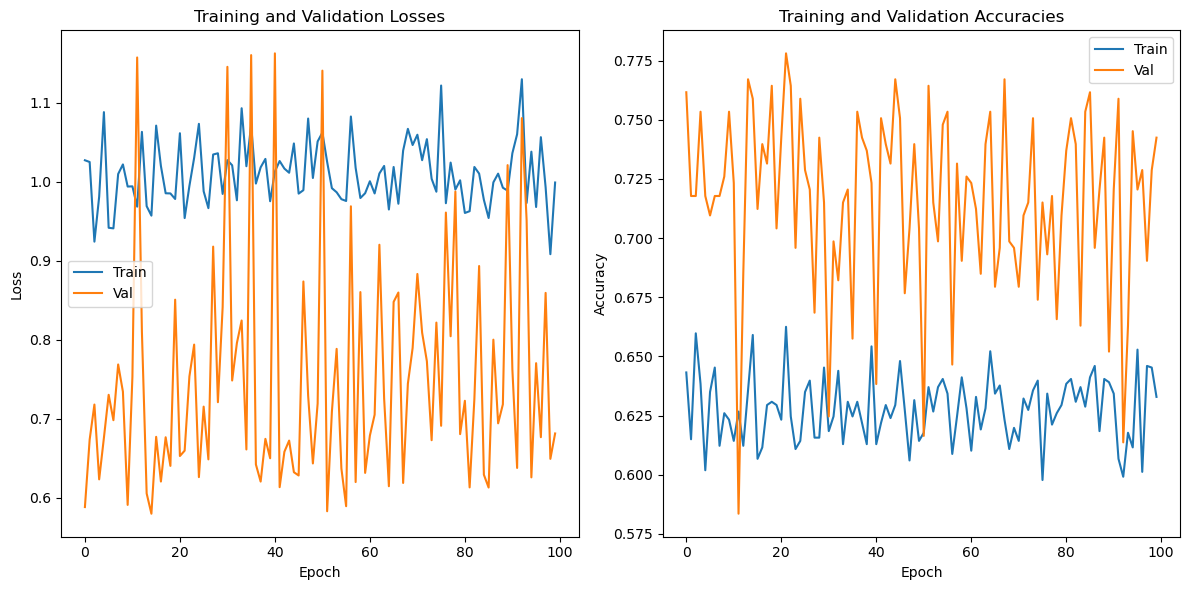

In [14]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies')

plt.tight_layout()
plt.show()

In [15]:
# Save the model
torch.save(model.state_dict(), 'eye_disease_classification_model.pth')

### Unseen Image 

In [16]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('eye_disease_classification_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 4)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:4]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:4]

c:\Users\hulsambath\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hulsambath\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
# Load and preprocess the unseen image
import random
from PIL import Image
import torch
from torchvision import transforms

root_dir = 'Test'
subdirs = ['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']

# Select a random subdirectory
random_subdir = random.choice(subdirs)

# Get a list of all image files in the chosen subdirectory
image_files = os.listdir(os.path.join(root_dir, random_subdir))

# Filter out non-image files if necessary (optional, depending on your directory structure)
image_files = [file for file in image_files if file.endswith(('jpg', 'jpeg', 'png'))]

# Select a random image file
random_image_file = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(root_dir, random_subdir, random_image_file)

# image_path = 'Test\glaucoma\_49_249201.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

print("Path of random file:", image_path)

Path of random file: Test\cataract\_38_5463921.jpg


In [26]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']  # Make sure these class names match your training data

if predicted_class.item() < len(class_names):
    predicted_class_name = class_names[predicted_class.item()]
else:
    predicted_class_name = "Unknown"

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: cataract


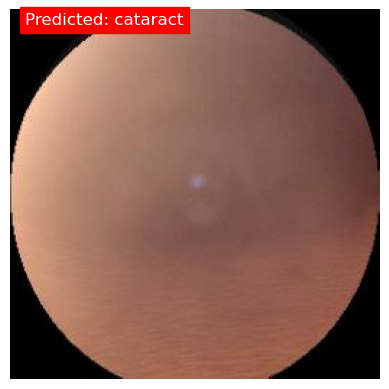

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()